In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pylab

import seaborn as sns

import csv

import scipy
from scipy import stats
import statistics

In [2]:
%matplotlib inline
import deepdish as dd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import numpy as np
import brainiak.eventseg.event
from scipy import stats
from scipy.stats import norm, zscore, pearsonr
from scipy.signal import gaussian, convolve
from sklearn import decomposition
import seaborn as sns 
import numpy as np

In [3]:
vectorDim = 100

numNode = 1000

reps = 40 #50
kvalues = 20

# the data structures to save the means for the coherent and incoherent
coherent_means = np.empty(reps)
incoherent_means = np.empty(reps)

coherent_vars_1 = np.empty(reps)
coherent_vars_2 = np.empty(reps) 

incoherent_vars_1 = np.empty(reps)
incoherent_vars_2 = np.empty(reps) 

likelihood = np.zeros([kvalues,reps,2])



In [4]:
# now the radical loop: 1. run 2 reservoirs; 2. calculate time contst; 
# 3.sort;  4. segment (ubuntu)
# here we will just segment the sorted reservoir states

kvalues = 20
reps = 40
for res_seed in range(reps):
 
    ###################################################################
    #
    #               4. Segment
    
    string1 = '/home/peter/Downloads/data_erd_states/mod_in_True_mod_topTrue_Direct_False_%s.npy' % res_seed

    sherl_erd_adj_SortedStates = np.load(string1) 

    # get the pieces
    #sherl_erd_adj_time1=sherl_erd_adj_SortedStates[:,0:99]
    #sherl_erd_adj_time2=sherl_erd_adj_SortedStates[:,900:999]
     

    sherl_erd_adj_time1=sherl_erd_adj_SortedStates[:,200:299]
    sherl_erd_adj_time2=sherl_erd_adj_SortedStates[:,500:599]

    sherl_erd_adj_time1test=sherl_erd_adj_SortedStates[:,200:299]
    sherl_erd_adj_time2test=sherl_erd_adj_SortedStates[:,500:599]





    if res_seed == 0:
        sherl_erd_adj_time1_cumul = sherl_erd_adj_time1
        sherl_erd_adj_time2_cumul = sherl_erd_adj_time2
    else:
        sherl_erd_adj_time1_cumul = sherl_erd_adj_time1 + sherl_erd_adj_time1_cumul
        sherl_erd_adj_time2_cumul = sherl_erd_adj_time2 + sherl_erd_adj_time2_cumul
    
    # now test the different k values
    
    for iteration in range(kvalues):

        ###################################################################
        #
        #               4. Segment

        #simple data structure for testing

        step = 2
        # Train the two HMS with the predicted segments
        ev_time1 = brainiak.eventseg.event.EventSegment((iteration+1)*step)
        ev_time1.fit(sherl_erd_adj_time1[1000:1650,:])

        ev_time2 = brainiak.eventseg.event.EventSegment((iteration+1)*step)
        ev_time2.fit(sherl_erd_adj_time2[1000:1650,:])
        print((iteration+1)*step)

        # save the variablility scores

        coherent_ev1_var = ev_time1.event_var_
        coherent_ev2_var = ev_time2.event_var_

        # save likelihood scores
        #likelihood[iteration, res_seed,0] = ev_time1.ll_[len(ev_time1.ll_)-1]
        #likelihood[iteration, res_seed,1] = ev_time2.ll_[len(ev_time2.ll_)-1]
        a,likelihood[iteration, res_seed,0] = ev_time1.find_events(sherl_erd_adj_time1test[1000:1650,:])
        a,likelihood[iteration, res_seed,1] = ev_time2.find_events(sherl_erd_adj_time2test[1000:1650,:])

        print("res_seed = ", res_seed)
        print("Likelihood")
        print(*likelihood[iteration, res_seed,:], sep='\n')


2
res_seed =  0
Likelihood
-1085.284722653022
-1136.665551617076
4
res_seed =  0
Likelihood
-1082.6813621581034
-1150.792357680604
6
res_seed =  0
Likelihood
-1092.872202177302
-1157.5600494741075
8
res_seed =  0
Likelihood
-1092.6101163593462
-1231.2563920188143
10
res_seed =  0
Likelihood
-1086.938155453382
-1297.6649266866073
12
res_seed =  0
Likelihood
-1093.0648711222195
-1361.7754131134034
14
res_seed =  0
Likelihood
-1117.664881961595
-1415.4885733326735
16
res_seed =  0
Likelihood
-1120.7971443966685
-1538.759222848587
18
res_seed =  0
Likelihood
-1130.498578727595
-1649.2493998304851
20
res_seed =  0
Likelihood
-1126.321939430027
-1722.2549391073098
22
res_seed =  0
Likelihood
-1131.262265623725
-1825.7842741323595
24
res_seed =  0
Likelihood
-1141.3369850379934
-1964.2839236372317
26
res_seed =  0
Likelihood
-1147.0135096710762
-2084.883021485083
28
res_seed =  0
Likelihood
-1146.2164376870328
-2190.275790880683
30
res_seed =  0
Likelihood
-1153.8711978834078
-2280.7923486529

8
res_seed =  6
Likelihood
-1103.851699780063
-1273.0291331127346
10
res_seed =  6
Likelihood
-1115.616861816345
-1371.8007465962173
12
res_seed =  6
Likelihood
-1126.4250990944624
-1441.8657613989446
14
res_seed =  6
Likelihood
-1127.551287171665
-1548.9515744375008
16
res_seed =  6
Likelihood
-1133.2630665516356
-1671.6929481019051
18
res_seed =  6
Likelihood
-1136.4076598233173
-1751.020388475836
20
res_seed =  6
Likelihood
-1137.314691065776
-1859.3492822473754
22
res_seed =  6
Likelihood
-1141.7518799888126
-2005.4001528983326
24
res_seed =  6
Likelihood
-1129.3390551606935
-2088.6919028163024
26
res_seed =  6
Likelihood
-1139.5624421785915
-2195.530204464576
28
res_seed =  6
Likelihood
-1137.83897069137
-2346.1500163784226
30
res_seed =  6
Likelihood
-1143.4589332450892
-2511.806682958897
32
res_seed =  6
Likelihood
-1151.5297047968652
-2692.245634682606
34
res_seed =  6
Likelihood
-1154.6777792014564
-2886.7635836519353
36
res_seed =  6
Likelihood
-1159.750162957552
-3044.227879

12
res_seed =  12
Likelihood
-1086.915666075762
-1203.2154351856823
14
res_seed =  12
Likelihood
-1082.7071504094886
-1258.3645767017724
16
res_seed =  12
Likelihood
-1112.6660279569974
-1319.5120607674105
18
res_seed =  12
Likelihood
-1118.42665226438
-1414.0507192764285
20
res_seed =  12
Likelihood
-1118.1322346990933
-1470.0030733124006
22
res_seed =  12
Likelihood
-1133.0375679881354
-1582.6503257027573
24
res_seed =  12
Likelihood
-1136.674818174652
-1652.3619633813814
26
res_seed =  12
Likelihood
-1133.4479629135958
-1732.48629696682
28
res_seed =  12
Likelihood
-1136.9203046597054
-1855.7853831818031
30
res_seed =  12
Likelihood
-1135.9447572990935
-1980.2189207250667
32
res_seed =  12
Likelihood
-1143.886735848233
-2108.818538933095
34
res_seed =  12
Likelihood
-1148.76099528101
-2250.5172432910604
36
res_seed =  12
Likelihood
-1157.2040226280362
-2373.65732581497
38
res_seed =  12
Likelihood
-1155.9389649716609
-2570.968301283571
40
res_seed =  12
Likelihood
-1169.510758252550

14
res_seed =  18
Likelihood
-1115.0705187910023
-1345.7450387874674
16
res_seed =  18
Likelihood
-1119.0879097497143
-1438.9603533724812
18
res_seed =  18
Likelihood
-1123.1314366716538
-1531.6422015138573
20
res_seed =  18
Likelihood
-1124.1237233774414
-1665.7257776015929
22
res_seed =  18
Likelihood
-1133.9949287963984
-1776.964819956117
24
res_seed =  18
Likelihood
-1130.9107533140827
-1887.2792559324182
26
res_seed =  18
Likelihood
-1133.3934558403416
-2043.456887906502
28
res_seed =  18
Likelihood
-1140.9558855573898
-2178.976487859507
30
res_seed =  18
Likelihood
-1157.1224240849526
-2321.610191866526
32
res_seed =  18
Likelihood
-1159.5343803719209
-2491.6118135397937
34
res_seed =  18
Likelihood
-1154.8804585346882
-2632.0316060086175
36
res_seed =  18
Likelihood
-1172.2621302578905
-2830.6290121267134
38
res_seed =  18
Likelihood
-1177.138504140464
-2997.1453186518324
40
res_seed =  18
Likelihood
-1178.1883825895068
-3165.719219135406
2
res_seed =  19
Likelihood
-1130.244398

16
res_seed =  24
Likelihood
-1109.4204799379008
-1258.611487048821
18
res_seed =  24
Likelihood
-1120.863530111726
-1302.013165150905
20
res_seed =  24
Likelihood
-1143.9877907515242
-1323.9654895653512
22
res_seed =  24
Likelihood
-1138.7706136931358
-1405.7922445870765
24
res_seed =  24
Likelihood
-1144.1956819661978
-1490.3402548599995
26
res_seed =  24
Likelihood
-1155.0221475734786
-1576.8138907632754
28
res_seed =  24
Likelihood
-1158.6581829814668
-1667.826994638519
30
res_seed =  24
Likelihood
-1164.0248761954092
-1762.2103909385712
32
res_seed =  24
Likelihood
-1183.7147487854106
-1873.5943901834921
34
res_seed =  24
Likelihood
-1180.3278920150724
-1981.6109253283787
36
res_seed =  24
Likelihood
-1189.8138739517003
-2085.757491151815
38
res_seed =  24
Likelihood
-1197.1219533752776
-2231.8957349066527
40
res_seed =  24
Likelihood
-1210.4281993494708
-2390.48572598099
2
res_seed =  25
Likelihood
-1112.2059843155455
-1030.7443906868473
4
res_seed =  25
Likelihood
-1039.13862756

18
res_seed =  30
Likelihood
-1104.49136172942
-1303.050790814691
20
res_seed =  30
Likelihood
-1116.6184212887902
-1353.0941086818152
22
res_seed =  30
Likelihood
-1076.088462666261
-1417.559029661956
24
res_seed =  30
Likelihood
-1091.764429516035
-1523.734004063772
26
res_seed =  30
Likelihood
-1145.7984500591174
-1617.8023101752565
28
res_seed =  30
Likelihood
-1104.576926976832
-1736.8729124229692
30
res_seed =  30
Likelihood
-1110.8379523523072
-1833.8914528636828
32
res_seed =  30
Likelihood
-1123.5165380585063
-1872.4299520173763
34
res_seed =  30
Likelihood
-1128.9090054039468
-2023.600696212974
36
res_seed =  30
Likelihood
-1142.470726508755
-2109.5615190975263
38
res_seed =  30
Likelihood
-1149.1215315075544
-2286.0262960773994
40
res_seed =  30
Likelihood
-1152.2244568991364
-2387.1116011994172
2
res_seed =  31
Likelihood
-1124.122681103644
-1105.0627703518896
4
res_seed =  31
Likelihood
-1124.070585032449
-1087.558354688053
6
res_seed =  31
Likelihood
-1123.5496973682946
-

20
res_seed =  36
Likelihood
-1137.4165007007118
-1451.5210832794335
22
res_seed =  36
Likelihood
-1142.89537794796
-1541.0232287718375
24
res_seed =  36
Likelihood
-1148.3818730777198
-1653.0630788641192
26
res_seed =  36
Likelihood
-1160.6869061816158
-1770.9351076858934
28
res_seed =  36
Likelihood
-1122.6540031594807
-1877.6473678884938
30
res_seed =  36
Likelihood
-1157.0076946270872
-1963.9024966302268
32
res_seed =  36
Likelihood
-1169.3090402552637
-2077.9714827500534
34
res_seed =  36
Likelihood
-1150.5410687157223
-2215.8707026337606
36
res_seed =  36
Likelihood
-1158.5400439512007
-2367.417689289299
38
res_seed =  36
Likelihood
-1167.5347740155094
-2491.7646198572243
40
res_seed =  36
Likelihood
-1188.556013222086
-2668.2473698396248
2
res_seed =  37
Likelihood
-1046.710020427687
-1119.5366350639458
4
res_seed =  37
Likelihood
-1070.8844840484405
-1089.7343452780167
6
res_seed =  37
Likelihood
-1084.101011465973
-1150.6337399212734
8
res_seed =  37
Likelihood
-1086.653618241

In [5]:
#for the figure get the mean reservoir states
sherl_erd_adj_time1_last = sherl_erd_adj_time1
sherl_erd_adj_time2_last = sherl_erd_adj_time2

np.save('sherl_erd_adj-time1-last-june10.npy', sherl_erd_adj_time1) 
np.save('sherl_erd_adj-time2-last-june10.npy', sherl_erd_adj_time2) 



In [6]:
sherl_erd_adj_time1 = np.load('sherl_erd_adj-time1-last-june10.npy') 
sherl_erd_adj_time2 = np.load('sherl_erd_adj-time2-last-june10.npy') 


In [7]:
sherl_erd_adj_time1 = sherl_erd_adj_time1_cumul/reps
sherl_erd_adj_time2 = sherl_erd_adj_time2_cumul/reps

In [8]:
#save the data likelihood
np.save('sherl_erd_adj-time1-june10.npy', sherl_erd_adj_time1) 
np.save('sherl_erd_adj-time2-june10.npy', sherl_erd_adj_time2) 

np.save('likelihood-erd-adjusted-transfer-same.npy', likelihood) 

In [9]:
sherl_erd_adj_time1 = sherl_erd_adj_time1_last
sherl_erd_adj_time2 = sherl_erd_adj_time2_last

In [10]:
# sement and make figure

ev_time1 = brainiak.eventseg.event.EventSegment(22)
ev_time1.fit(sherl_erd_adj_time1[1000:1650,:])

ev_time2 = brainiak.eventseg.event.EventSegment(8)
ev_time2.fit(sherl_erd_adj_time2[1000:1650,:])


for j in range(99):
    mean = sherl_erd_adj_time1[:,j].mean()
    if abs(mean) > 0.01: #WAS .01
        sherl_erd_adj_time1[:,j] = sherl_erd_adj_time1[:,j]/mean

for j in range(99):
    mean = sherl_erd_adj_time2[:,j].mean()
    if abs(mean) > 0.01:
        sherl_erd_adj_time2[:,j] = sherl_erd_adj_time2[:,j]/mean

#save the data likelihood
#np.save('sherl_erd_adj-time1-june6.npy', sherl_erd_adj_time1) 
#np.save('sherl_erd_adj-time2-june6.npy', sherl_erd_adj_time2) 

#np.save('likelihood-june6.npy', likelihood) 

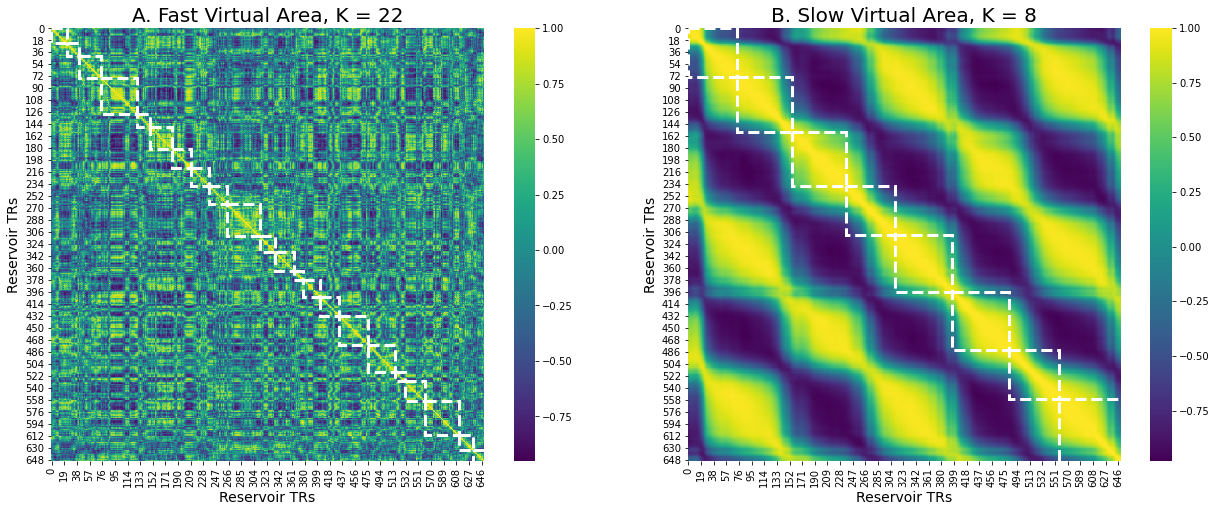

In [11]:
# 3 display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(18, 7))

fig.add_subplot(121)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_adj_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_adj_time1),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_adj_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(122)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_adj_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_adj_time2),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_adj_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)


fig.tight_layout()
plt.savefig('Exp4-erd.png')

In [12]:
tmatrix=np.zeros([kvalues,kvalues])
pmatrix=np.zeros([kvalues,kvalues])
dmatrix=np.zeros([kvalues,kvalues])
                  

In [13]:
#likelihood = np.zeros([kvalues,reps,fastslow])
# compare all k pairs to see if the p values are significant

for j in range(kvalues):
    for i in range(j):
        # when i < j
        anti = (likelihood[i,:,0]+ likelihood[j,:,1])/2 # small k with fast area + large k with slow area 
        pro = (likelihood[j,:,0]+ likelihood[i,:,1])/2  # large k with fast area + small k with slow area
        dmatrix[i,j]=np.mean(pro-anti)
        t,p = stats.ttest_rel(pro,anti)
        tmatrix[i,j]=t
        pmatrix[i,j]=p
        #if t > 0 and p< 0.01:
        if p<0.05:
            print(i,j,t,p)


0 2 2.4015239411586773 0.021190792548570515
1 2 2.248499687412057 0.03026911179086811
0 3 4.384774358317218 8.526561907845917e-05
1 3 4.348164436612555 9.540040594796458e-05
2 3 4.681254511384354 3.405336975971481e-05
0 4 6.083002743940439 3.9713344717300205e-07
1 4 6.175696393143281 2.95265203840481e-07
2 4 7.0556819677405125 1.7974576057619503e-08
3 4 7.039400451903302 1.892271035163805e-08
0 5 7.165967229896484 1.2695675894267136e-08
1 5 7.252085092334006 9.683166558267489e-09
2 5 7.946055899161552 1.1173842307818118e-09
3 5 8.416101560503698 2.6598620911226584e-10
4 5 7.05820794378999 1.7831826926024098e-08
0 6 8.53448726983606 1.8601190001060122e-10
1 6 8.665050122194792 1.2562100819779164e-10
2 6 9.615699782872603 7.671043826080009e-12
3 6 10.214929117484914 1.3964193418654924e-12
4 6 10.182435614303593 1.5297362504640392e-12
5 6 8.807337997036395 8.208565198184646e-11
0 7 9.13914854199113 3.072234023112579e-11
1 7 9.150034695543532 2.9754364999925386e-11
2 7 9.776834913092102 4.

(20, 20)
44
2.704304622293451e-15
2.025334500767968e-14


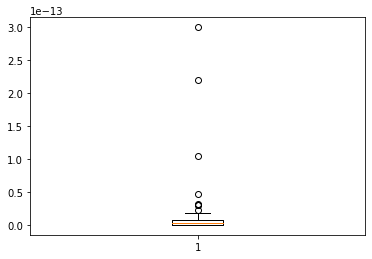

In [14]:
print(pmatrix.shape)
imin=0
imax=5
jmin=10
jmax=19
pmeans=np.zeros([(imax-imin)*(jmax-jmin)])
#likelihood = np.zeros([kvalues,reps,fastslow])
# compare all k pairs to see if the p values are significant

count=0
for i in range(imin,imax):
    for j in range(jmin,jmax):
        #print(i,j,pmatrix[i,j],count)
        pmeans[count]=pmatrix[i,j]
        count=count+1
print(count-1)
print(statistics.median(pmeans))
print(statistics.mean(pmeans))
plt.boxplot(pmeans)
plt.show()

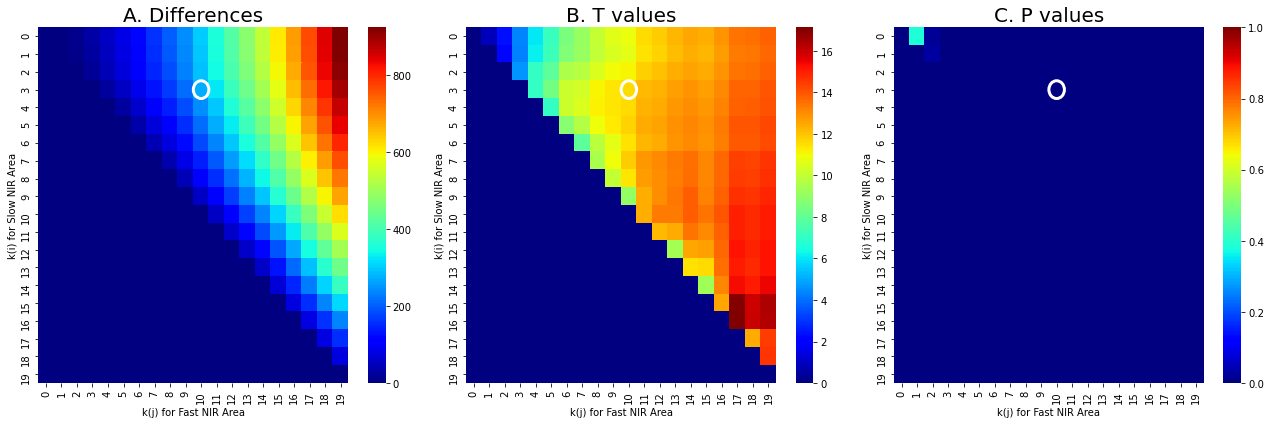

In [15]:
# 3 display the segmentation
color='jet'
ec='black'
scale=0.9
lw=2

fs1 = 14
fs2 = 20



fig=plt.figure(figsize=(18, 6))

fig.add_subplot(131)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color)
plt.title('A. Differences', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.add_subplot(132)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(tmatrix, cmap=color)
plt.title('B. T values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.add_subplot(133)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color, vmax = 1)
plt.title('C. P values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.tight_layout()
plt.savefig('likelihoodk-areas-no-norm-erd.png')

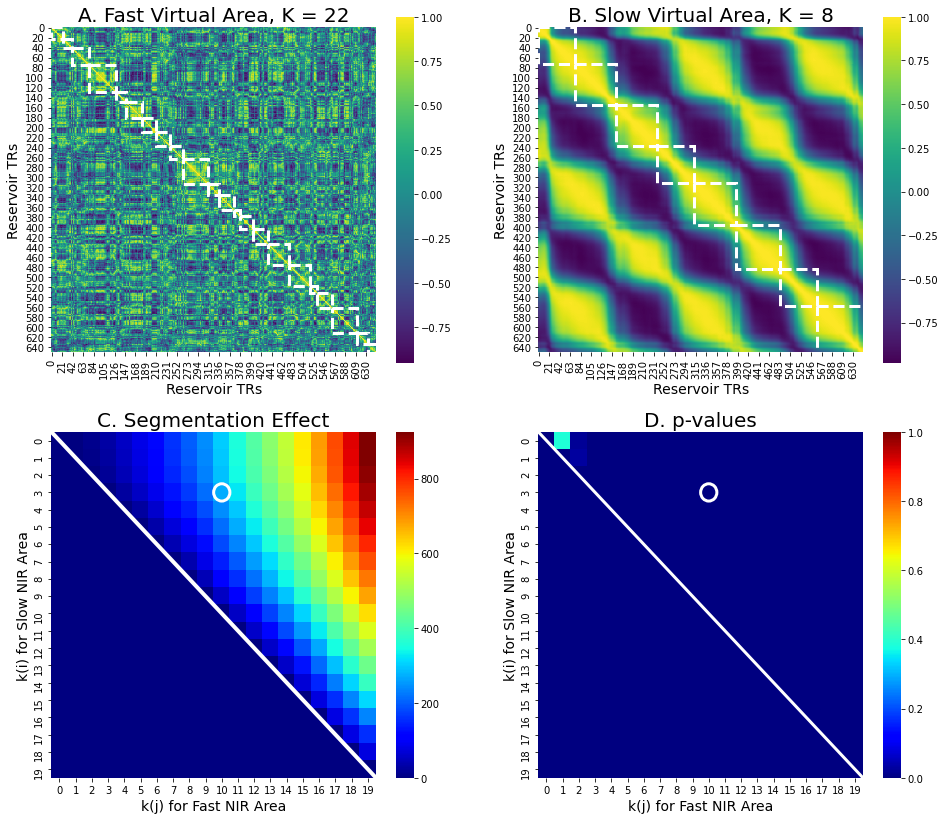

In [16]:
#new figure with the example and then the grid search
# display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(16, 14))

fig.add_subplot(221)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_adj_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_adj_time1),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_adj_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(222)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_adj_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_adj_time2),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_adj_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)

##########################
color = 'jet'
fig.add_subplot(223)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color)
plt.title('C. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.add_subplot(224)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color,vmax=1)
plt.title('D. p-values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w',lw=3)




#fig.tight_layout()
plt.savefig('F10-Exp4-sherl_erd_adj.png', dpi=600)


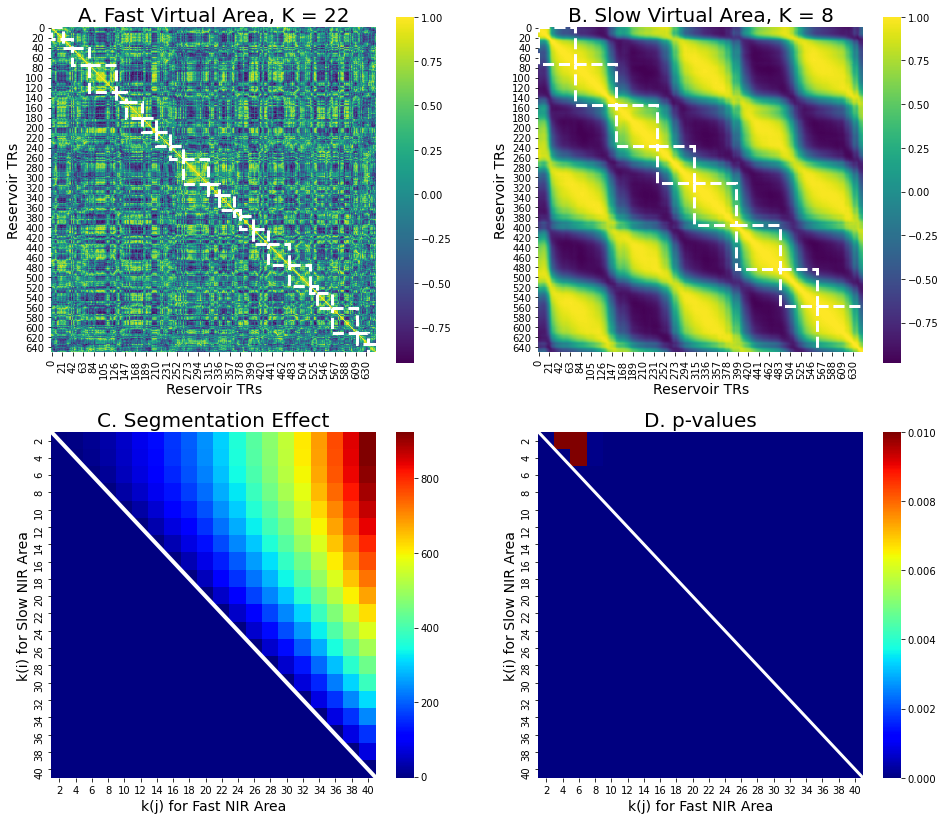

In [17]:
#new figure with the example and then the grid search
# display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(16, 14))

fig.add_subplot(221)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_adj_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_adj_time1),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_adj_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(222)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_adj_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_adj_time2),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_adj_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)

##########################

A1 = np.linspace(2,40,20, dtype=int)
A2 = np.linspace(2,40,20, dtype=int)

color = 'jet'
fig.add_subplot(223)
ax = fig.gca()
circle2 = plt.Circle((18.5, 11.5), 0.5, color='w', fill=False,  lw=3)
#ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color, xticklabels=A1, yticklabels=A2,vmin=-3)
plt.title('C. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.add_subplot(224)
ax = fig.gca()
circle2 = plt.Circle((18.5, 11.5), 0.5, color='w', fill=False,  lw=3)
#ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color, xticklabels=A1, yticklabels=A2,vmax = 0.01)
plt.title('D. p-values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w',lw=3)




#fig.tight_layout()
plt.savefig('F10-Exp4-sherl_erd_adj.png', dpi=600)


Text(0, 0.5, 'Log likelihood difference')

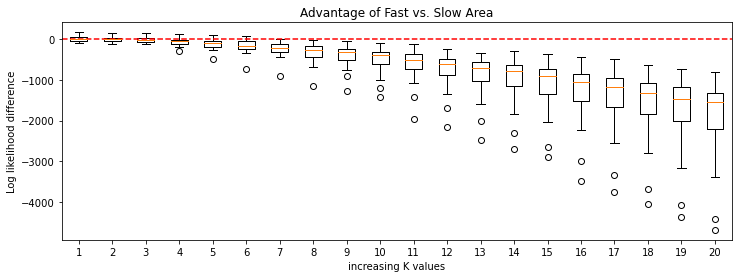

In [18]:
#likelihood = np.zeros([kvalues,reps,fastslow])
# small K is slow, likelihood 1 is slow
# high K is fast, likelihood 0 is fast

#model k
#slow slow - fast slow
#slow fast - fast fast


f, ax = plt.subplots(1,1, figsize=(12, 4))

ax.boxplot(likelihood[:,:,1].T-likelihood[:,:,0].T)
#ax.boxplot(likelihood[:,:,0].T)
#ax.boxplot(likelihood[:,:,1].T)
#ax.boxplot(likelihood)
#ax.plot(likelihood[:,1])

plt.axhline(y=0, color='r', linestyle='--')


ax.set_title('Advantage of Fast vs. Slow Area')
ax.set_xlabel('increasing K values')
ax.set_ylabel('Log likelihood difference')
#
#sns.despine()

(array([ 1.,  0.,  1.,  0.,  1.,  4.,  7.,  9., 13.,  4.]),
 array([-2070.62586288, -1979.39707188, -1888.16828088, -1796.93948987,
        -1705.71069887, -1614.48190786, -1523.25311686, -1432.02432586,
        -1340.79553485, -1249.56674385, -1158.33795285]),
 <BarContainer object of 10 artists>)

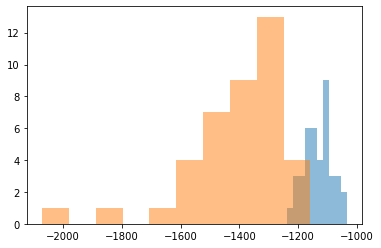

In [19]:
data3 = (likelihood[3,:,0]+ likelihood[10,:,1])/2
data4 = (likelihood[10,:,0]+ likelihood[3,:,1])/2

plt.hist(data4, alpha=0.5)
plt.hist(data3,alpha=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4ee5915550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4ee5915dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4ee5915190>,
 'medians': [<matplotlib.lines.Line2D at 0x7f4ee58a06d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4ee58a0b10>,
 'means': []}

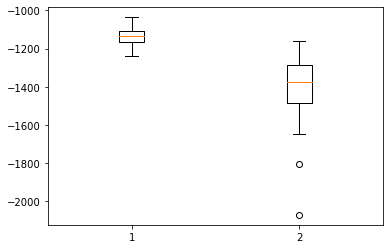

In [20]:
plt.boxplot([data4,data3])

In [21]:
#4 15 4.307048321216739 7.923701639107483e-05
t,p = stats.ttest_rel(data4,data3)
print(t)
print(p)
print(np.mean(data4-data3))

11.600306889849433
3.250967008700497e-14
271.26751660346446


In [22]:
print(np.shape(likelihood))
print(kvalues)

(20, 40, 2)
20


<AxesSubplot:>

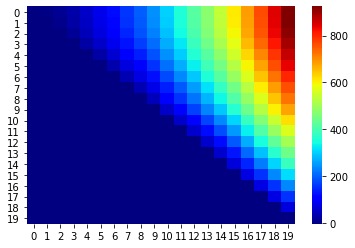

In [23]:
sns.heatmap(dmatrix,cmap='jet',vmin=-3)

In [24]:
print(dmatrix[11,13:20])
print(pmatrix[11,13:20])      

[121.05141947 182.46661105 253.4928707  330.88914932 410.59968515
 490.77727841 567.47240215]
[3.31370578e-15 2.89666683e-16 8.05886636e-16 1.28620823e-16
 8.85653863e-18 1.36521107e-17 7.36212094e-18]


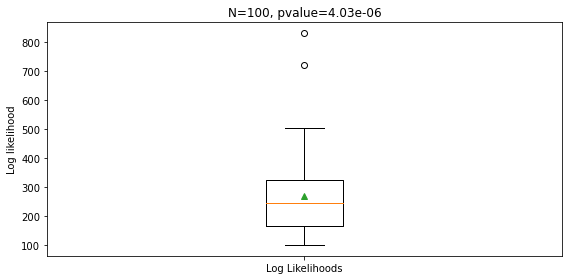

In [25]:

fig=plt.figure(figsize=(8, 4))
#f,ax = plt.subplots(1,1, figsize=(5, 5))
plt.boxplot(data4-data3,showmeans=True)
#plt.xlabel('Coherent                                    Incoherent')
plt.ylabel('Log likelihood')
#plt.axhline(y=0, color='r', linestyle='--')

plt.xticks([1], ['Log Likelihoods'])#ax.set_xticklabels(['Coherent-Incoherent'])
plt.title('N=100, pvalue=4.03e-06')
fig.tight_layout()
plt.savefig('temp2.png')

IndexError: index 25 is out of bounds for axis 0 with size 20

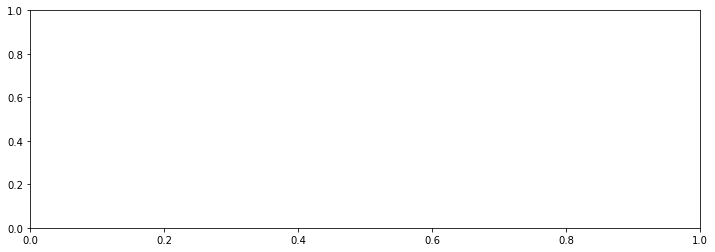

In [26]:
f, ax = plt.subplots(1,1, figsize=(12, 4))

ax.plot(likelihood[4,:,0]-likelihood[25,:,1])
#ax.boxplot(likelihood)
#ax.plot(likelihood[:,1])

plt.axhline(y=0, color='r', linestyle='--')


ax.set_title('Advantage of Fast vs. Slow Area')
ax.set_xlabel('increasing K values')
ax.set_ylabel('Log likelihood difference')
#
#sns.despine()

In [ ]:
likelihood = np.load('likelihood-june10.npy')

In [ ]:
#np.save('sherl_erd_adj-time1-june6.npy', sherl_erd_adj_time1) 
#np.save('sherl_erd_adj-time2-june6.npy', sherl_erd_adj_time2) 

#np.save('likelihood-june6.npy', likelihood) 

sherl_erd_adj_time1 = np.load('sherl_erd_adj-time1-last-june10.npy')
sherl_erd_adj_time2 = np.load('sherl_erd_adj-time2-last-june10.npy')

In [ ]:
sherl_erd_adj_time1 = np.load('sherl_erd_adj-time1-june10.npy')
sherl_erd_adj_time2 = np.load('sherl_erd_adj-time2-june10.npy')

In [ ]:
ev_time1 = brainiak.eventseg.event.EventSegment(88)
ev_time1.fit(sherl_erd_adj_time1)

ev_time2 = brainiak.eventseg.event.EventSegment(32)
ev_time2.fit(sherl_erd_adj_time2)
print((iteration+1)*step)

# save the variablility scores

coherent_ev1_var = ev_time1.event_var_
coherent_ev2_var = ev_time2.event_var_

# save likelihood scores
print(ev_time1.ll_[len(ev_time1.ll_)-1])
print(ev_time2.ll_[len(ev_time2.ll_)-1])


